In [1]:
######## RR Interval Analysis and Stress Level Detection
# This notebook will guide you through analyzing RR Interval (RRI) data to calculate RMSSD values and observe stress levels over time.

## Step 1: Import Necessary Libraries
#```python
import pandas as pd  # Library to help us load and work with data
import numpy as np  # Library for working with numbers, helps in calculations
import matplotlib.pyplot as plt  # Library to make plots


In [2]:
## Step 2: Load the Data from CSV File
# Here, we are loading the data into a DataFrame, a table-like structure, which is useful for handling data.

data = pd.read_csv("RRIdata.csv")


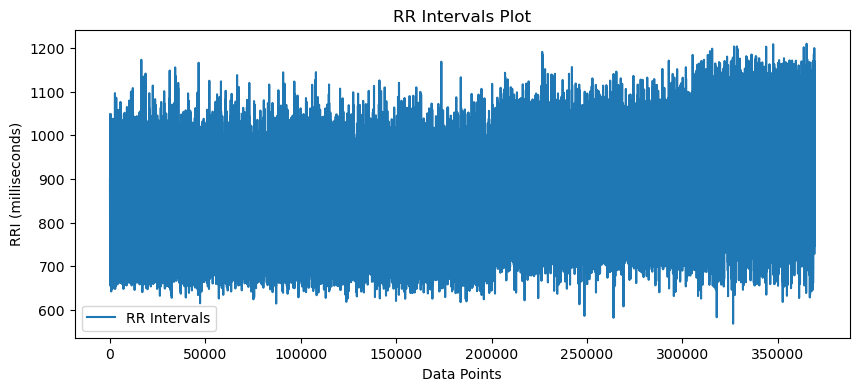

In [3]:
## Step 3: Plot the RRI Data to Observe How It Changes
# This plot will help us see the range of RRI values, their minimum, and maximum.

plt.figure(figsize=(10, 4))
plt.plot(data['RRI'], label='RR Intervals')
plt.xlabel('Data Points')
plt.ylabel('RRI (milliseconds)')
plt.title('RR Intervals Plot')
plt.legend()
plt.show()


In [4]:
## Step 4: Calculate RMSSD (Root Mean Square of Successive Differences) without Windowing
# RMSSD is a way to measure variations in RR Intervals, often used to assess stress levels.

def calculate_rmssd(rri_values):
    differences = np.diff(rri_values)  # Calculate the difference between successive RRI values
    squared_diff = differences ** 2  # Square each difference
    mean_squared_diff = np.mean(squared_diff)  # Take the average of these squared differences
    rmssd = np.sqrt(mean_squared_diff)  # Take the square root of the average
    return rmssd

rmssd_value = calculate_rmssd(data['RRI'])
print(f'RMSSD without windowing is an overall measure of RMSSD over whole time which for this data is : {rmssd_value} milliseconds')


RMSSD without windowing is an overall measure of RMSSD over whole time which for this data is : 55.17898119725974 milliseconds


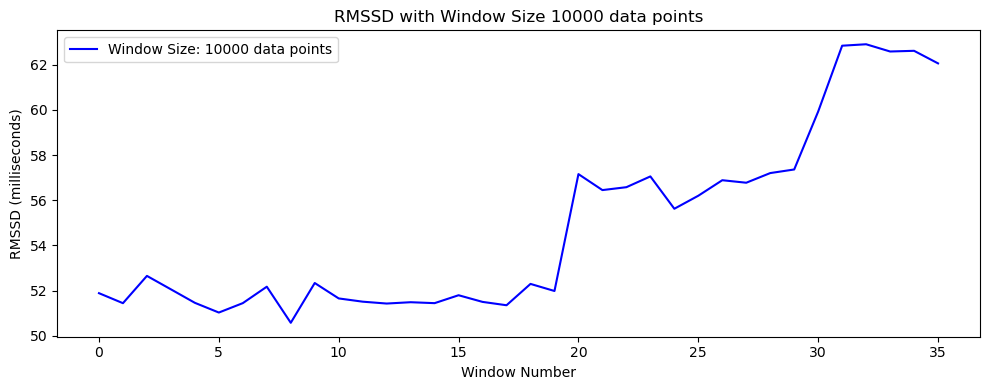

In [5]:
## Step 5: Apply Windowing and Calculate RMSSD for a shorter time period defined as Window Size 
# Windowing means we calculate RMSSD in small sections instead of all data at once.

window_size = 10000 # TRY CHANGING WINDOW SIZE BETWEEN 1 and 10000
rmssd_values = [calculate_rmssd(data['RRI'][j:j+window_size])
                for j in range(0, len(data) - window_size + 1, window_size)]

# Plot the RMSSD values for window size 100
plt.figure(figsize=(10, 4))
plt.plot(rmssd_values, label=f'Window Size: {window_size} data points', color='b')
plt.xlabel('Window Number')
plt.ylabel('RMSSD (milliseconds)')
plt.title(f'RMSSD with Window Size {window_size} data points')
plt.legend()
plt.tight_layout()
plt.show()


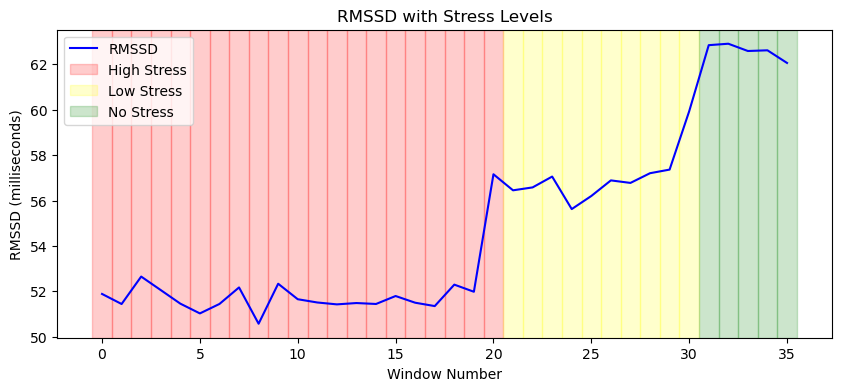

In [6]:
## Step 6: Calculate RMSSD with a Window Size of 1000 and Highlight Stress Regions
# We will calculate RMSSD for windows of size 1000 and use shaded backgrounds to represent stress levels.

window_size = 10000
rmssd_values = [calculate_rmssd(data['RRI'][j:j+window_size]) 
                for j in range(0, len(data) - window_size + 1, window_size)]
labels = data['LABELS'][::window_size][:len(rmssd_values)]  # Get corresponding stress labels

plt.figure(figsize=(10, 4))
plt.plot(rmssd_values, label='RMSSD', color='blue')  # Plot RMSSD as a line

# Initialize legend labels to control when each label appears
legend_added = {"No Stress": False, "Low Stress": False, "High Stress": False}

# Add shaded background for each stress level
for i in range(len(rmssd_values)):
    if labels.iloc[i] == 0:  # No Stress
        plt.axvspan(i - 0.5, i + 0.5, color='green', alpha=0.2, 
                    label='No Stress' if not legend_added["No Stress"] else "")
        legend_added["No Stress"] = True
    elif labels.iloc[i] == 1:  # Low Stress
        plt.axvspan(i - 0.5, i + 0.5, color='yellow', alpha=0.2, 
                    label='Low Stress' if not legend_added["Low Stress"] else "")
        legend_added["Low Stress"] = True
    else:  # High Stress
        plt.axvspan(i - 0.5, i + 0.5, color='red', alpha=0.2, 
                    label='High Stress' if not legend_added["High Stress"] else "")
        legend_added["High Stress"] = True

plt.xlabel('Window Number')
plt.ylabel('RMSSD (milliseconds)')
plt.title('RMSSD with Stress Levels')
plt.legend()  # Automatically gathers unique legend entries
plt.show()


In [7]:
## Step 7: Calculate RMSSD Threshold Values for Stress Levels
# These thresholds can be adjusted based on data to rate stress levels.

no_stress_threshold = np.percentile(rmssd_values, 33)  # Lower third of RMSSD values
low_stress_threshold = np.percentile(rmssd_values, 66)  # Middle third
high_stress_threshold = np.max(rmssd_values)  # Upper third

print("Suggested RMSSD thresholds:")
print(f"High Stress: < {no_stress_threshold} milliseconds")
print(f"Low Stress: {no_stress_threshold} milliseconds to {low_stress_threshold} milliseconds")
print(f"No Stress: > {low_stress_threshold} milliseconds")


Suggested RMSSD thresholds:
High Stress: < 51.73042270641987 milliseconds
Low Stress: 51.73042270641987 milliseconds to 56.599504864604654 milliseconds
No Stress: > 56.599504864604654 milliseconds
